In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# import the csv file: 'Chinese Thermal Comfort Dataset Heating Season_tsv.csv' in the current folder
df = pd.read_csv('CN_DB.csv')
df.head()

,suject_id,timestamp,season,city,climate,building_type,heating_type,gender,age,ht,...,clo,met,ta,rh,vel,tg,top,tr,t_out_min,latitude
0,1,1/30/19 10:35,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,18-30,170.0,...,1.10,1.0,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
1,2,1/30/19 10:42,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,41-50,168.0,...,1.83,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
2,3,1/30/19 10:45,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,41-50,170.0,...,1.36,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
3,4,1/30/19 10:47,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,178.0,...,1.58,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
4,5,1/31/19 20:20,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,174.0,...,1.38,0.9,20.9,33.0,0.0,19.8,20.0,19.8,-7.28,36.62


In [30]:
df.columns

Index(['suject_id', 'timestamp', 'season', 'city', 'climate', 'building_type',
       'heating_type', 'gender', 'age', 'ht', 'wt', 'thermal_sensation',
       'thermal_comfort', 'thermal_acceptability', 'clo', 'met', 'ta', 'rh',
       'vel', 'tg', 'top', 'tr', 't_out_min', 'latitude'],
      dtype='object')

In [31]:
# group by city, using mean values
df_city = df.groupby('city').agg(
    records=('city', 'size'),
    thermal_sensation=('thermal_sensation', 'mean'),
    thermal_comfort=('thermal_comfort', 'mean'),
    thermal_acceptability=('thermal_acceptability', 'mean'),
    ta=('ta', 'mean'),
    top=('top', 'mean'),
    clo=('clo', 'mean'),
    latitude=('latitude', 'mean')
).reset_index()

In [32]:
df_city

,city,records,thermal_sensation,thermal_comfort,thermal_acceptability,ta,top,clo,latitude
0,Baotou,303,0.016502,1.465347,0.345183,19.766997,19.277228,0.341782,40.65
1,Beijing,651,-0.027957,1.569800,0.320480,22.948541,22.066052,0.920568,39.90
2,FujianFuzhou,7,-0.714286,1.571429,0.328571,18.100000,18.100000,0.351429,26.08
3,FujianNanping,4,0.000000,1.000000,0.325000,17.900000,17.900000,0.417500,26.64
4,FujianZhenjiang,2,-0.500000,1.500000,0.550000,22.900000,22.900000,0.305000,26.10
5,GuangdongGuangzhou,997,-0.013039,1.377131,0.462588,23.850150,23.876128,0.859910,23.13
6,HainanSanya,5,0.600000,1.600000,0.420000,24.880000,24.880000,0.332000,18.25
7,HebeiHandan,26,-0.384615,1.192308,0.853846,19.576923,19.300000,1.447692,36.62
8,HeilongjiangHarbin,3552,0.293300,1.623226,0.749831,23.085107,22.707995,0.923361,45.75
9,HenanJiaozuo,888,-0.255631,1.388514,NaN,16.798874,16.798874,1.188874,35.24


## Indoor temperture distribution

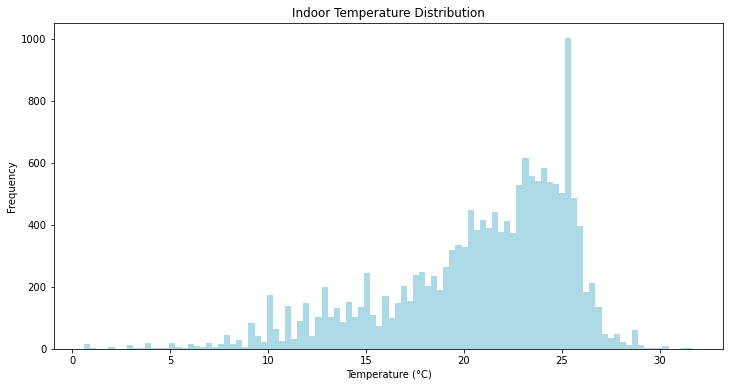

In [33]:
# plot the indoor temperature distribution
plt.figure(figsize=(12, 6))
plt.hist(df['ta'], bins=100, color='lightblue')
plt.title('Indoor Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

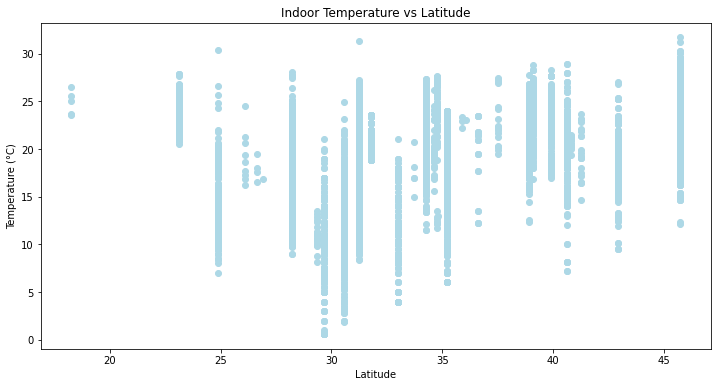

In [34]:
# scatter plot the indoor temperature against latitude
plt.figure(figsize=(12, 6))
plt.scatter(df['latitude'], df['ta'], color='lightblue')
plt.title('Indoor Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.show()

In [35]:
# acesending the df by latitude
df_city = df_city.sort_values('latitude')
df_city

,city,records,thermal_sensation,thermal_comfort,thermal_acceptability,ta,top,clo,latitude
6,HainanSanya,5,0.600000,1.600000,0.420000,24.880000,24.880000,0.332000,18.25
5,GuangdongGuangzhou,997,-0.013039,1.377131,0.462588,23.850150,23.876128,0.859910,23.13
32,YunnanKunming,415,-1.154217,1.424242,0.687879,13.617108,13.617108,0.647133,24.87
2,FujianFuzhou,7,-0.714286,1.571429,0.328571,18.100000,18.100000,0.351429,26.08
4,FujianZhenjiang,2,-0.500000,1.500000,0.550000,22.900000,22.900000,0.305000,26.10
3,FujianNanping,4,0.000000,1.000000,0.325000,17.900000,17.900000,0.417500,26.64
18,HunanHengyang,1,-1.000000,2.000000,-0.100000,16.900000,16.900000,0.660000,26.89
17,HunanChangsha,1108,-0.396029,2.816697,0.414621,17.222563,17.413267,0.947500,28.23
29,SichuanZigong,23,-0.217391,1.608696,0.643478,11.026087,11.026087,1.586522,29.34
20,Lhasa,355,-1.095775,NaN,NaN,10.640845,10.640845,1.253380,29.65


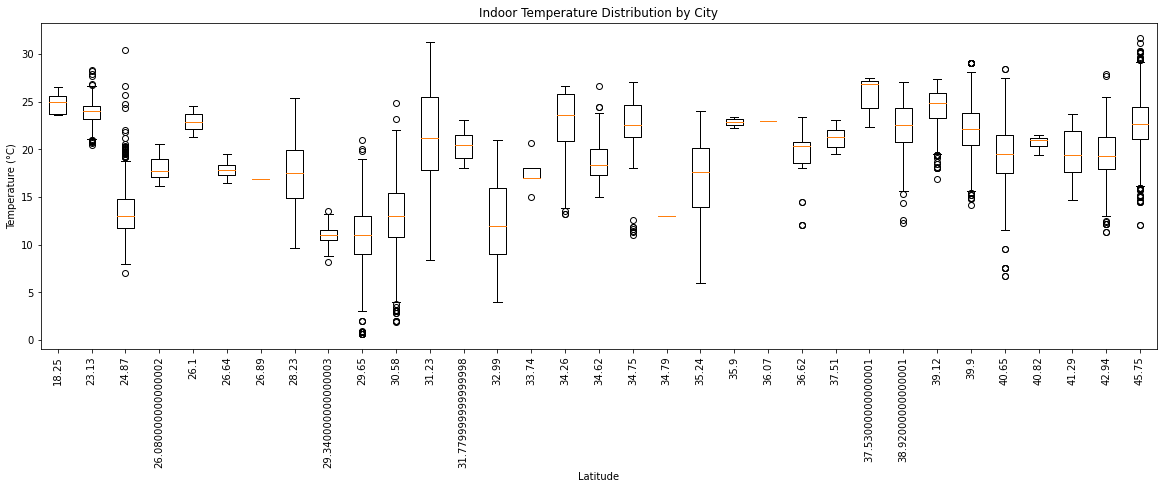

In [42]:
# box plot the indoor temperature distribution by city, show latitude as x-axis
plt.figure(figsize=(20, 6))
plt.boxplot([df[df['city'] == city]['top'] for city in df_city['city']], labels=df_city['latitude'])
plt.title('Indoor Temperature Distribution by City')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

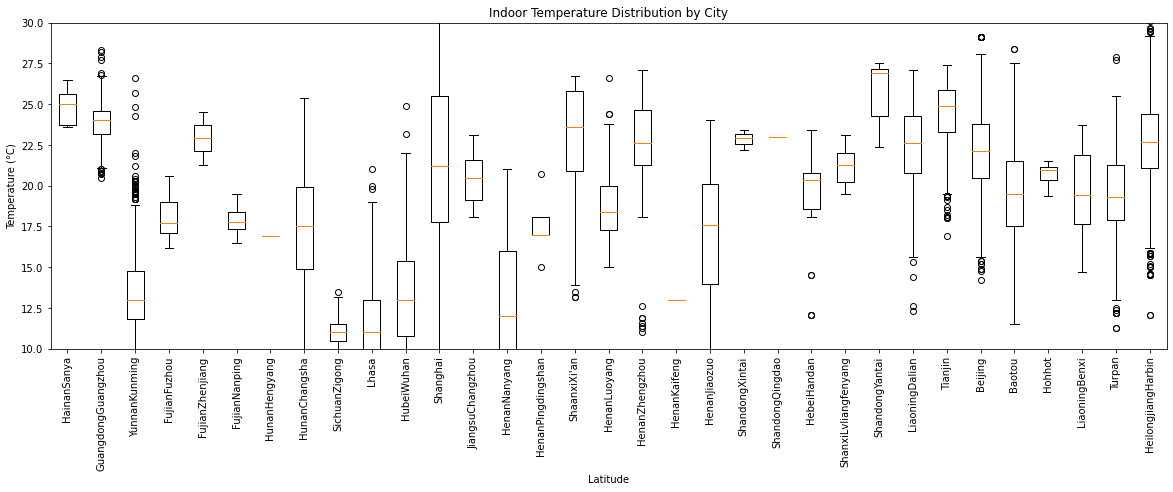

In [43]:
# box plot the indoor temperature distribution by city, show latitude as x-axis
plt.figure(figsize=(20, 6))
plt.boxplot([df[df['city'] == city]['top'] for city in df_city['city']], labels=df_city['city'])
# limit the y-axis to 10-30
plt.ylim(10, 30)
plt.title('Indoor Temperature Distribution by City')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90) # Rotate x-axis labels by 45 degrees
plt.show()

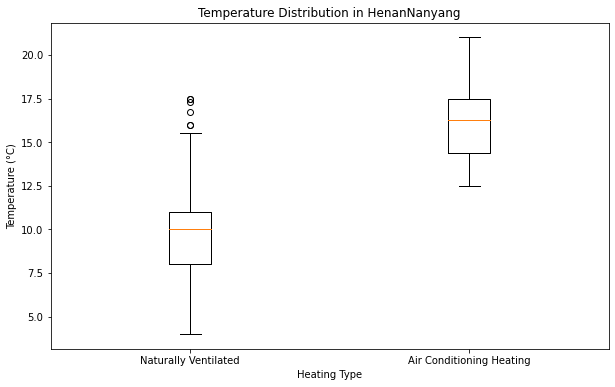

In [38]:
# Data for the two box plots
data_naturally_ventilated = df[(df['city'] == 'HenanNanyang') & (df['heating_type'] == 'Naturally Ventilated')]['ta']
data_air_conditioning_heating = df[(df['city'] == 'HenanNanyang') & (df['heating_type'] == 'Air conditioning heating')]['ta']

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data_naturally_ventilated, data_air_conditioning_heating], labels=['Naturally Ventilated', 'Air Conditioning Heating'])
plt.title('Temperature Distribution in HenanNanyang')
plt.xlabel('Heating Type')
plt.ylabel('Temperature (°C)')
plt.show()

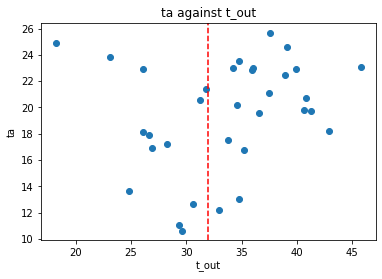

In [39]:
# plot the city mean ta against latitude 
plt.scatter(df_city['latitude'], df_city['ta'])
plt.xlabel('t_out')
plt.ylabel('ta')
plt.title('ta against t_out')
plt.axvline(x=32, color='r', linestyle='--')
plt.show()

## Comfort Vote

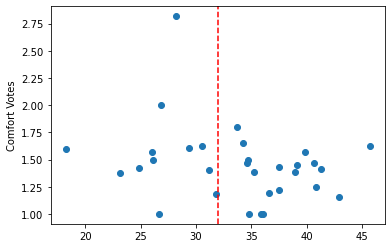

In [40]:
# plot the scatter plot of comfort votes against latitude, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_city['latitude']
y = df_city['thermal_comfort']
sizes = df_city['records']  # This will control the size of the points
plt.scatter(x, y)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=32, color='r', linestyle='--')
plt.ylabel('Comfort Votes')
plt.show()

## Acceptability Vote

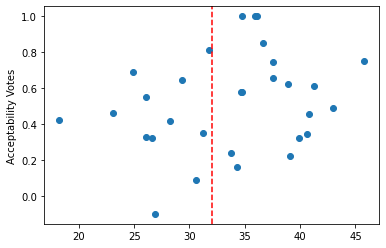

In [41]:
plt.figure(figsize=(6, 4))
x = df_city['latitude']
y = df_city['thermal_acceptability']
sizes = df_city['records']  # This will control the size of the points
plt.scatter(x, y)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=32, color='r', linestyle='--')
plt.ylabel('Acceptability Votes')
plt.show()
